# Airbnb New User Bookings  - Kaggle Project

## Data Exploration, Cleaning, Visualizations and Final Dataset Creation

## Part 1 of 2

The customer is the focus of any business, keeping them happy and engaged will benefit both the customer and the business equally. Therefore it pays to know your customer's needs before they ask for it. As it helps the business keep inventory, support, and recommendations on hand just before the customer asks for it. This concept is implemented by many technology companies and industries to provide recommendations to the consumer before they even think about it. 

Airbnb being a revolutionary technology company which has disrupted the short rental space is no exception, It would be helpful to know the user's behavior in order to efficiently cater their products and services. The motivation for this project stems from the fact that vast amounts of data are collected from users on a daily basis by a company. They rely on prediction to serve their customers better. A classification algorithm can be used for such purposes. Data cleaning, Data wrangling, and visualizations can be performed for better analysis and improve the systems that are currently in place. All in all an effective learning experience.

## Importing required libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Draw inline
%matplotlib inline

# Set figure aesthetics
# sns.set_style("white", {'ytick.major.size': 10.0})
# sns.set_context("poster", font_scale=1.1)

# Loading Datasets, Data Exploration and Visualization

The dataset contains 5 .csv files with information necessary to make a prediction. They are:

**"countries.csv"** - summary statistics of destination countries in this dataset and their locations.  
**"age\_gender\_bkts.csv"** - summary statistics of users age group, gender, country of destination.  
**"train\_users.csv"** - the training set of users.  
**"test\_users.csv"** - the test set of users.    
**"sessions.csv"** - web sessions log for users.  

We will explore and go through each of them in detail. 

In [21]:
# Loading the most important datsets of them all to a pandas dataframe, train_users_2.csv and test_users.csv

train_data = pd.read_csv("dataset/train_users_2.csv")
test_data = pd.read_csv("dataset/test_users.csv")

print "Total number of rows in training data: %d" %(len(train_data))
print "Total number of columns in training data: %d \n " %(len(train_data.columns))
print "The columns in training are : %s \n" %(train_data.columns.values)


print "Total number of rows in testing data: %d" %(len(test_data))
print "Total number of columns in testing data: %d\n" %(len(test_data.columns))
print "The columns in testing are : %s" %(test_data.columns.values)


Total number of rows in training data: 213451
Total number of columns in training data: 16 
 
The columns in training are : ['id' 'date_account_created' 'timestamp_first_active' 'date_first_booking'
 'gender' 'age' 'signup_method' 'signup_flow' 'language'
 'affiliate_channel' 'affiliate_provider' 'first_affiliate_tracked'
 'signup_app' 'first_device_type' 'first_browser' 'country_destination'] 

Total number of rows in testing data: 62096
Total number of columns in testing data: 15

The columns in testing are : ['id' 'date_account_created' 'timestamp_first_active' 'date_first_booking'
 'gender' 'age' 'signup_method' 'signup_flow' 'language'
 'affiliate_channel' 'affiliate_provider' 'first_affiliate_tracked'
 'signup_app' 'first_device_type' 'first_browser']


In [22]:
# Loading the countries.csv and age_gender_bkts.csv datasets.

countries = pd.read_csv("dataset/countries.csv")
brackets = pd.read_csv("dataset/age_gender_bkts.csv")

print "Total number of rows in countries data: %d" %(len(countries))
print "Total number of columns in countries data: %d \n " %(len(countries.columns))
print "The columns in countries are : %s \n" %(countries.columns.values)


print "Total number of rows in brackets data: %d" %(len(brackets))
print "Total number of columns in brackets data: %d\n" %(len(brackets.columns))
print "The columns in brackets are : %s" %(brackets.columns.values)


Total number of rows in countries data: 10
Total number of columns in countries data: 7 
 
The columns in countries are : ['country_destination' 'lat_destination' 'lng_destination' 'distance_km'
 'destination_km2' 'destination_language ' 'language_levenshtein_distance'] 

Total number of rows in brackets data: 420
Total number of columns in brackets data: 5

The columns in brackets are : ['age_bucket' 'country_destination' 'gender' 'population_in_thousands'
 'year']


In [23]:
'''
Loading the session.csv , this dataset will be helpful in obtaining the user data 
session which will contain information which can be joined with the training and testing data 
which will help us predict a better outcome.
'''
sessions = pd.read_csv("dataset/sessions.csv")

print "Total number of rows in sessions data: %d" %(len(sessions))
print "Total number of columns in sessions data: %d\n" %(len(sessions.columns))
print "The columns in sessions are : %s" %(sessions.columns.values)


Total number of rows in sessions data: 10567737
Total number of columns in sessions data: 6

The columns in sessions are : ['user_id' 'action' 'action_type' 'action_detail' 'device_type'
 'secs_elapsed']


## Exploring , Cleaning and Visualizing Training and Testing datasets

In [24]:
# Display Training data to get a better look.

train_data

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


The total number of rows in the testing data is 213451 and no of columns is 16, which makes this a medium size dataset. 

The dataset needs to be cleaned and imputed as it contains lot of NaN and unknown values. The basic process that will be followed contains

1. Converting all the dates column to datetime format.
2. Changing the `-unknown-` values to np.nan and then -1
3. Checking for bogus data in columns, especially `age, language, country_destination`
4. One hot encode the dataset and prepare for data for fitting into an ML algorithm.

First lets try to describe this dataset.

In [25]:
train_data.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


The describe function only shows us 3 columns since only they have numerical.

The `timestamp_first_active` has very large numbers as the timestamp is in a numerical format and not datetime. This has to be changed to datetime format.

The age column has a few outliers as, the maximum value is 2014, no man can live that long. The reason seems to be that people might have input the current year instead of the age or maybe for privacy reasons might input a random value. Same case for the minimum value which is 1. Newborn babies aren't that smart. These have to be removed and replaced with NaN values. Even though the age is wrong, it would be nice to get the data from these individuals who would like to browse privately. Maybe these people might have similar booking tendencies.

The signup_flow is the other column with numerical values, it seems it has values ranging from 0 to 25.

## Converting the dates to datetime format. 

So we need to convert the `date_account_created`, `timestamp_first_active` and `date_first_booking` to the datetime format.

In [26]:
# Taking a closer look at these three date columns. 

train_data[["date_account_created","timestamp_first_active","date_first_booking"]]

,date_account_created,timestamp_first_active,date_first_booking
0,2010-06-28,20090319043255,NaN
1,2011-05-25,20090523174809,NaN
2,2010-09-28,20090609231247,2010-08-02
3,2011-12-05,20091031060129,2012-09-08
4,2010-09-14,20091208061105,2010-02-18
5,2010-01-01,20100101215619,2010-01-02
6,2010-01-02,20100102012558,2010-01-05
7,2010-01-03,20100103191905,2010-01-13
8,2010-01-04,20100104004211,2010-07-29
9,2010-01-04,20100104023758,2010-01-04


In [100]:
# Change these dates to datetime format.

train_data["date_account_created"] = pd.to_datetime(train_data["date_account_created"])
train_data["date_first_booking"] = pd.to_datetime(train_data["date_first_booking"])

# Change timestamp_first_active to datetime format, since this is in a numerical format we have to define
# the format.

train_data["timestamp_first_active"] = pd.to_datetime(train_data["timestamp_first_active"],format= "%Y%m%d%H%M%S")

# Describe the data so as to do a preliminary confirmation.

print train_data["date_account_created"].describe()
print "\n"
print train_data["timestamp_first_active"].describe()
print "\n"
print train_data["date_first_booking"].describe()

count                  213451
unique                   1634
top       2014-05-13 00:00:00
freq                      674
first     2010-01-01 00:00:00
last      2014-06-30 00:00:00
Name: date_account_created, dtype: object


count                  213451
unique                 213451
top       2013-07-01 05:26:34
freq                        1
first     2009-03-19 04:32:55
last      2014-06-30 23:58:24
Name: timestamp_first_active, dtype: object


count                   88908
unique                   1976
top       2014-05-22 00:00:00
freq                      248
first     2010-01-02 00:00:00
last      2015-06-29 00:00:00
Name: date_first_booking, dtype: object


As seen above we have modified the dates to a datetime format.

In [101]:
train_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [102]:
# Check for NaN values in all the columns.

train_data.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

There are null values in `date_first_booking, age, first_affiliate_tracked`.  
We will have to deal with these null values in the coming steps. First lets start cleaning the dataset.

## Removing unknowns and other bogus values and replacing with NaN

### Exploring the unique values in categorical data columns

In [103]:
# Printing all the unique values of columns which contain categorical data values.

print "unique values in gender:\n",train_data.gender.unique()
print " "
print "unique values in signup_method:\n",train_data.signup_method.unique()
print " "
print "unique values in language:\n",train_data.language.unique()
print ""
print "unique values in affiliate_channel:\n",train_data.affiliate_channel.unique()
print ""
print "unique values in affiliate_provider:\n",train_data.affiliate_provider.unique()
print ""
print "unique values in first_affiliate_tracked:\n",train_data.first_affiliate_tracked.unique()
print ""
print "unique values in signup_app:\n",train_data.signup_app.unique()
print ""
print "unique values in first_device_type:\n",train_data.first_device_type.unique()
print ""
print "unique values in first_browser:\n",train_data.first_browser.unique()
print " "
print "unique values in country_destination:\n", train_data.country_destination.unique()


unique values in gender:
['-unknown-' 'MALE' 'FEMALE' 'OTHER']
 
unique values in signup_method:
['facebook' 'basic' 'google']
 
unique values in language:
['en' 'fr' 'de' 'es' 'it' 'pt' 'zh' 'ko' 'ja' 'ru' 'pl' 'el' 'sv' 'nl' 'hu'
 'da' 'id' 'fi' 'no' 'tr' 'th' 'cs' 'hr' 'ca' 'is']

unique values in affiliate_channel:
['direct' 'seo' 'other' 'sem-non-brand' 'content' 'sem-brand' 'remarketing'
 'api']

unique values in affiliate_provider:
['direct' 'google' 'other' 'craigslist' 'facebook' 'vast' 'bing' 'meetup'
 'facebook-open-graph' 'email-marketing' 'yahoo' 'padmapper' 'gsp' 'wayn'
 'naver' 'baidu' 'yandex' 'daum']

unique values in first_affiliate_tracked:
['untracked' 'omg' nan 'linked' 'tracked-other' 'product' 'marketing'
 'local ops']

unique values in signup_app:
['Web' 'Moweb' 'iOS' 'Android']

unique values in first_device_type:
['Mac Desktop' 'Windows Desktop' 'iPhone' 'Other/Unknown' 'Desktop (Other)'
 'Android Tablet' 'iPad' 'Android Phone' 'SmartPhone (Other)']

unique va

### As we can see above,

`gender`, `first_browser` seems to have some `-unknown-` values . We will have to impute them to NaN.

The unique values of all the other columns seem to be valid. All the data values does make sense.

Lets start with gender and take a look at graphically.

In [104]:
print train_data.gender.unique()

['-unknown-' 'MALE' 'FEMALE' 'OTHER']


count        213451
unique            4
top       -unknown-
freq          95688
Name: gender, dtype: object


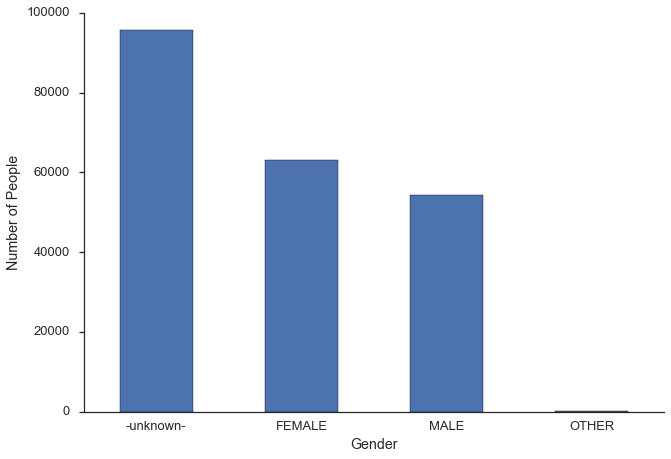

In [106]:
# Creating bar graph for gender data set.

# Set figure aesthetics
sns.set_style("white", {'ytick.major.size': 5.0})
sns.set_context("talk")

train_data.gender.value_counts(dropna=False).plot(kind='bar', rot=0)
plt.xlabel('Gender')
plt.ylabel('Number of People')
sns.despine()

print train_data["gender"].describe()

The graph clearly shows that there are more than 95000 profiles with `-unknown-` gender.  
**This has to be cleaned and replaced with NaN values.**  
They might be `-unknown-` because people might not have specified it or maybe it was not a field that was necessary to be filled. 

In [107]:
# replace all unknown gender values with NaN
# Imputing

train_data.gender.replace("-unknown-", np.nan, inplace=True)

count     117763
unique         3
top       FEMALE
freq       63041
Name: gender, dtype: object


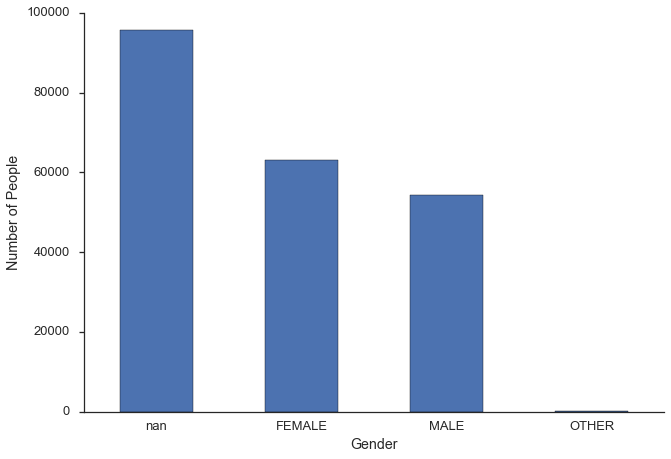

In [108]:
print train_data["gender"].describe()

train_data.gender.value_counts(dropna=False).plot(kind='bar', rot=0)
plt.xlabel('Gender')
plt.ylabel('Number of People')
sns.despine()

All the `-unknown-` values are converted into nan. Next we will impute the `first_browser` data. 

In [109]:
train_data.first_browser.replace("-unknown-", np.nan, inplace=True)

count     186185
unique        51
top       Chrome
freq       63845
Name: first_browser, dtype: object


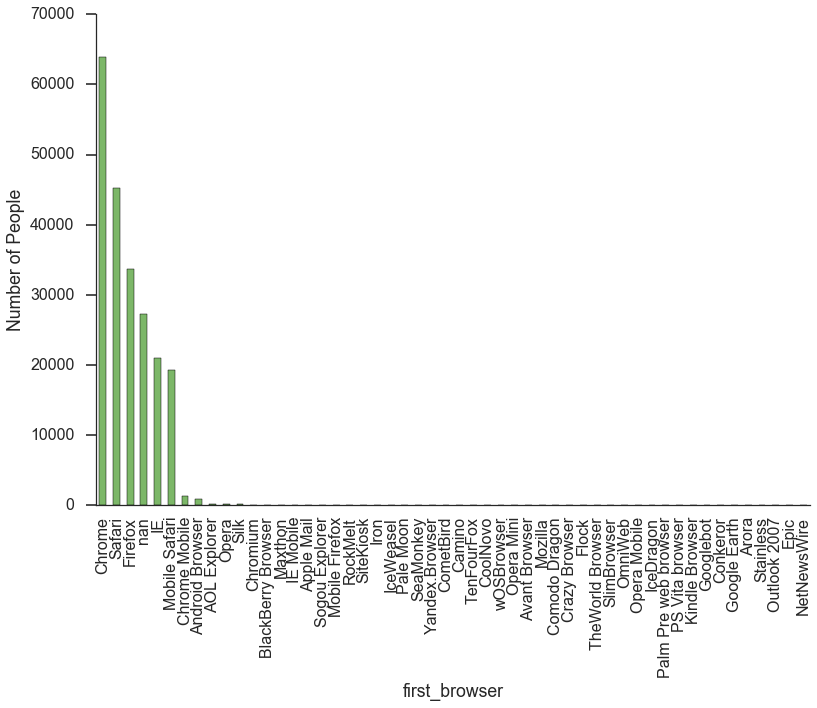

In [110]:
print train_data["first_browser"].describe()

with sns.axes_style("darkgrid"):
    sns.set_style("white", {'ytick.major.size': 10.0})
    sns.set_context("poster")
    train_data.first_browser.value_counts(dropna=False).plot(kind='bar',color="#7cb768")
    plt.xlabel('first_browser')
    plt.ylabel('Number of People')
    sns.despine()


The first_browser column has been cleaned. The top 5 most used browsers are Chrome, Safari, Firefox, IE and Mobile Safari. There are also about 28000 users who have used another mobile browser other than the ones listed.

### Let's take a look at the age column now. As we saw earlier, there were a lot of ages that did not make sense. Such as 2014, 1 etc. Lets graph it out to have better view.

count    2345.000000
mean      738.697655
std       897.655359
min       101.000000
25%       105.000000
50%       105.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64
 
count    57.000000
mean      4.438596
std       1.195491
min       1.000000
25%       5.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: age, dtype: float64


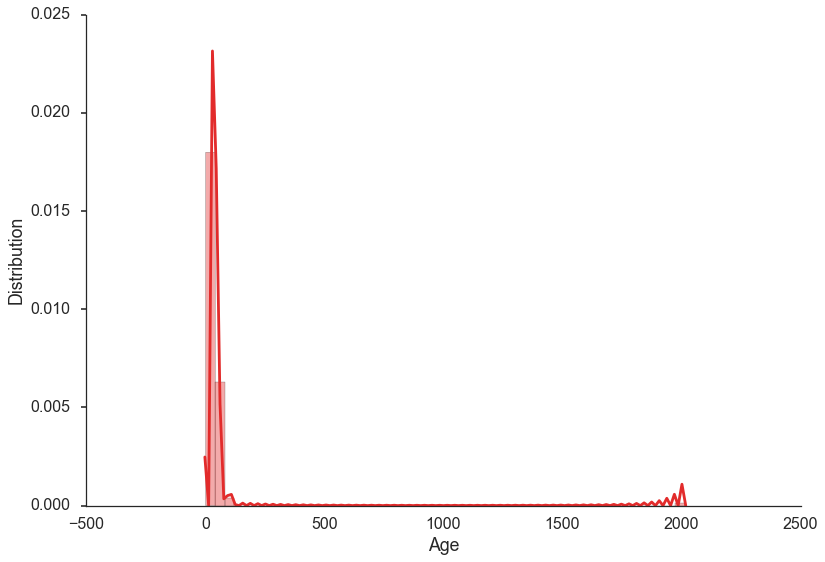

In [111]:
sns.distplot(train_data.age.dropna(),color='#e22b2b')
plt.xlabel('Age')
plt.ylabel('Distribution')
sns.despine()

print train_data[train_data.age > 100]['age'].describe()
print " "
print train_data[train_data.age < 15]['age'].describe()

As discussed earlier there are many datapoints which are above 120. some even in the range of 2000. Lets remove them.

It is difficult to decide which all age groups we should discard. The legal age for airbnb is 18. but in the case that even higher teenagers are allowed to book. lets set the age from **15 to 100.** Even though 100 is somewhat a higher limit for human species as of now. let's not exclude these outliers who are elderly.

In [112]:
# Converting all the bogus ages to nan values.
# Remove the age groups that doesn't make sense. more than 125 and lower than 15

train_data.age.loc[train_data.age < 15] = np.nan
train_data.age.loc[train_data.age > 100] = np.nan

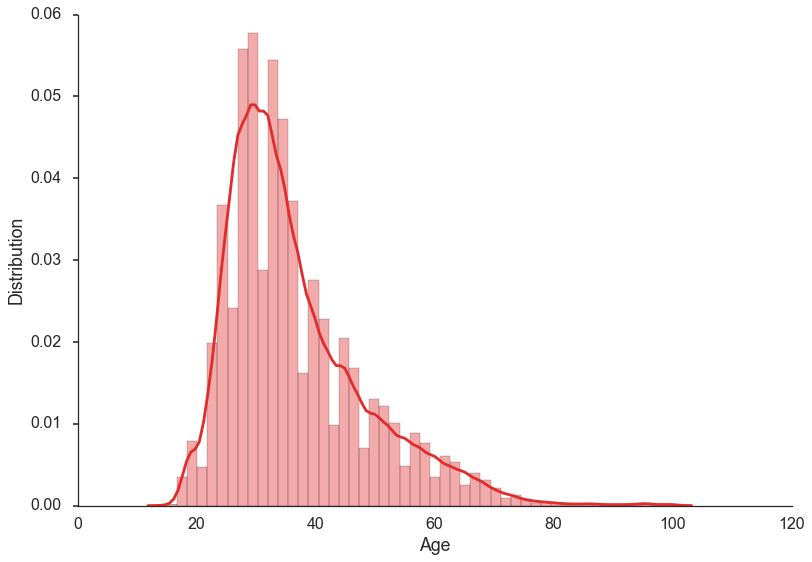

In [113]:
# Lets graph the age group as a distribution to check if all is well

sns.distplot(train_data.age.dropna(),color='#e22b2b')
plt.xlabel('Age')
plt.ylabel('Distribution')
sns.despine()

From the distribution we can see that most of the users lie in the 25 - 50 years of age.

In [45]:
# Storing the present state of train_data into features as a checkpoint and working on features from now on
features = train_data.copy()

With respect to the date and time columns, even though they are in a date-time format , lets split it up into three different colums for day, month and year as it will be easier for computation. We will be dropping the `date_first_booking` column as there is no point in keeping that as a feature as it happens only after the first booking.

In [46]:
# Splitting the two dates column into month, day, year for faster computation.

# date account created is dac
features["dac_year"] = features.date_account_created.dt.year
features["dac_month"] = features.date_account_created.dt.month
features["dac_day"] = features.date_account_created.dt.day


#timestamp_first_active is tfa
features["tfa_year"] = features.timestamp_first_active.dt.year
features["tfa_month"] = features.timestamp_first_active.dt.month
features["tfa_day"] = features.timestamp_first_active.dt.day


# Drop the features that are no longer needed. 
features.drop("date_first_booking", axis = 1,inplace = True)
features.drop("date_account_created", axis = 1,inplace = True)
features.drop("timestamp_first_active", axis = 1,inplace = True)



In [47]:
# Taking a look at the new table features to confirm the changes
print features.describe()
features.head()

                 age    signup_flow       dac_year      dac_month  \
count  123059.000000  213451.000000  213451.000000  213451.000000   
mean       36.559211       3.267387    2013.023846       6.022459   
std        11.690611       7.637707       0.938489       3.236690   
min        15.000000       0.000000    2010.000000       1.000000   
25%        28.000000       0.000000    2012.000000       3.000000   
50%        34.000000       0.000000    2013.000000       6.000000   
75%        42.000000       0.000000    2014.000000       9.000000   
max       100.000000      25.000000    2014.000000      12.000000   

             dac_day       tfa_year      tfa_month        tfa_day  
count  213451.000000  213451.000000  213451.000000  213451.000000  
mean       15.869230    2013.023218       6.022385      15.869071  
std         8.740107       0.939039       3.236501       8.739582  
min         1.000000    2009.000000       1.000000       1.000000  
25%         8.000000    2012.000000   

,id,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,dac_year,dac_month,dac_day,tfa_year,tfa_month,tfa_day
0,gxn3p5htnn,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2010,6,28,2009,3,19
1,820tgsjxq7,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2011,5,25,2009,5,23
2,4ft3gnwmtx,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,2010,9,28,2009,6,9
3,bjjt8pjhuk,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2011,12,5,2009,10,31
4,87mebub9p4,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2010,9,14,2009,12,8


In [48]:
# Check if there are duplicate id's in features.

print features[features.duplicated(['id'],keep=False)]

Empty DataFrame
Columns: [id, gender, age, signup_method, signup_flow, language, affiliate_channel, affiliate_provider, first_affiliate_tracked, signup_app, first_device_type, first_browser, country_destination, dac_year, dac_month, dac_day, tfa_year, tfa_month, tfa_day]
Index: []


As it returns an empty dataframe we know that there are no duplicate users in the feature data.  
##### One Hot Encoding all the columns that have categorical values.

In [49]:
# one hot encoding all the necessary features.

one_hot_encoding_features = ['gender', 'signup_method', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']
for f in one_hot_encoding_features:
    features_dummy = pd.get_dummies(features[f], prefix=f)
    features = features.drop(f, axis=1)
    features = pd.concat((features, features_dummy), axis=1)


In [50]:
# Listing out the columns for verification:
for i in features.columns:
    print i
    
print "\n The number of columns: %s" %(len(features.columns))
features.head()

id
age
signup_flow
country_destination
dac_year
dac_month
dac_day
tfa_year
tfa_month
tfa_day
gender_FEMALE
gender_MALE
gender_OTHER
signup_method_basic
signup_method_facebook
signup_method_google
language_ca
language_cs
language_da
language_de
language_el
language_en
language_es
language_fi
language_fr
language_hr
language_hu
language_id
language_is
language_it
language_ja
language_ko
language_nl
language_no
language_pl
language_pt
language_ru
language_sv
language_th
language_tr
language_zh
affiliate_channel_api
affiliate_channel_content
affiliate_channel_direct
affiliate_channel_other
affiliate_channel_remarketing
affiliate_channel_sem-brand
affiliate_channel_sem-non-brand
affiliate_channel_seo
affiliate_provider_baidu
affiliate_provider_bing
affiliate_provider_craigslist
affiliate_provider_daum
affiliate_provider_direct
affiliate_provider_email-marketing
affiliate_provider_facebook
affiliate_provider_facebook-open-graph
affiliate_provider_google
affiliate_provider_gsp
affiliate_provi

,id,age,signup_flow,country_destination,dac_year,dac_month,dac_day,tfa_year,tfa_month,tfa_day,...,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
0,gxn3p5htnn,NaN,0,NDF,2010,6,28,2009,3,19,...,0,0,0,0,0,0,0,0,0,0
1,820tgsjxq7,38.0,0,NDF,2011,5,25,2009,5,23,...,0,0,0,0,0,0,0,0,0,0
2,4ft3gnwmtx,56.0,3,US,2010,9,28,2009,6,9,...,0,0,0,0,0,0,0,0,0,0
3,bjjt8pjhuk,42.0,0,other,2011,12,5,2009,10,31,...,0,0,0,0,0,0,0,0,0,0
4,87mebub9p4,41.0,0,US,2010,9,14,2009,12,8,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# Since we have one hot encoded all the data now it is time to check for all the 
# null values and impute them if necessary.

features.isnull().sum()


id                                        0
age                                   90392
signup_flow                               0
country_destination                       0
dac_year                                  0
dac_month                                 0
dac_day                                   0
tfa_year                                  0
tfa_month                                 0
tfa_day                                   0
gender_FEMALE                             0
gender_MALE                               0
gender_OTHER                              0
signup_method_basic                       0
signup_method_facebook                    0
signup_method_google                      0
language_ca                               0
language_cs                               0
language_da                               0
language_de                               0
language_el                               0
language_en                               0
language_es                     

From the features dataset ie the training set we see that there in only one column which contains null values as now. ie. age   
The rest of the columns that contained null values earlier where removed because of one hot encoding.

##### Lets Impute the age column with NaN to -1.

There are a lot of ways in which we can impute data. We can take the mean, median ,mode of the distribution and plug it in. I believe that if we do such a thing, it will skew the data towards one end as it will drastically increase the number of users having that particular mean, median or mode age. 

Therefore, I believe that imputing it with -1 is a better choice. 

In [52]:
# Imputing age column NaN values with -1
features.age.replace(np.nan, -1 , inplace=True)


In [53]:
# Lets take a look at the final feature (Training set) dataset.

features

,id,age,signup_flow,country_destination,dac_year,dac_month,dac_day,tfa_year,tfa_month,tfa_day,...,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
0,gxn3p5htnn,-1.0,0,NDF,2010,6,28,2009,3,19,...,0,0,0,0,0,0,0,0,0,0
1,820tgsjxq7,38.0,0,NDF,2011,5,25,2009,5,23,...,0,0,0,0,0,0,0,0,0,0
2,4ft3gnwmtx,56.0,3,US,2010,9,28,2009,6,9,...,0,0,0,0,0,0,0,0,0,0
3,bjjt8pjhuk,42.0,0,other,2011,12,5,2009,10,31,...,0,0,0,0,0,0,0,0,0,0
4,87mebub9p4,41.0,0,US,2010,9,14,2009,12,8,...,0,0,0,0,0,0,0,0,0,0
5,osr2jwljor,-1.0,0,US,2010,1,1,2010,1,1,...,0,0,0,0,0,0,0,0,0,0
6,lsw9q7uk0j,46.0,0,US,2010,1,2,2010,1,2,...,0,0,0,0,0,0,0,0,0,0
7,0d01nltbrs,47.0,0,US,2010,1,3,2010,1,3,...,0,0,0,0,0,0,0,0,0,0
8,a1vcnhxeij,50.0,0,US,2010,1,4,2010,1,4,...,0,0,0,0,0,0,0,0,0,0
9,6uh8zyj2gn,46.0,0,US,2010,1,4,2010,1,4,...,0,0,0,0,0,0,0,0,0,0


### Lets have a look at the distribution of country_destination in the dataset.

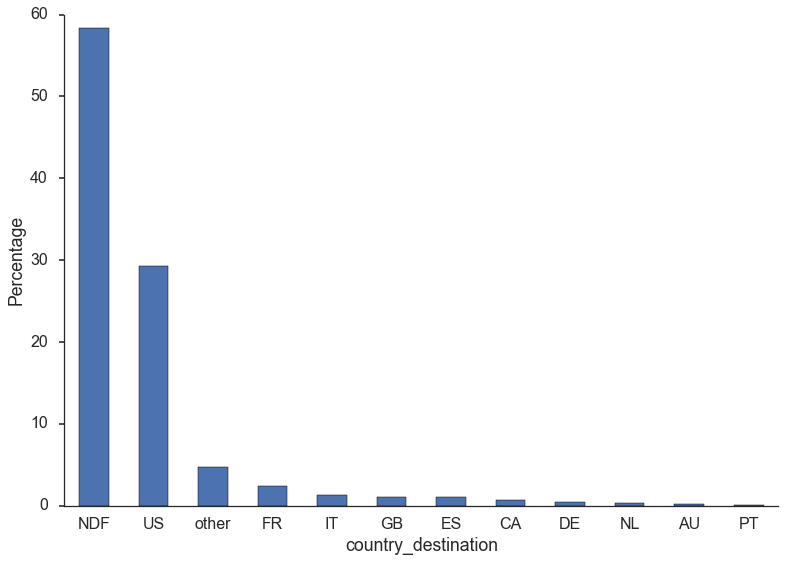

In [54]:
destination_percentage = features.country_destination.value_counts() / len(features) * 100
destination_percentage.plot(kind='bar', rot=0)
plt.xlabel('country_destination')
plt.ylabel('Percentage')
sns.despine()

About 58% of the users did not choose any destination. They merely made the account and did not use the service. This can be due to several reasons such as:
1. Just window shopping or trying out the application.
2. Did not get a good price etc 

etc.

# Now lets take a look at the test dataset

In [55]:
test_data = pd.read_csv("dataset/test_users.csv")

In [56]:
test_data

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari
5,szx28ujmhf,2014-07-01,20140701000336,NaN,FEMALE,28.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome
6,guenkfjcbq,2014-07-01,20140701000514,NaN,MALE,48.0,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-
7,tkpq0mlugk,2014-07-01,20140701000649,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
8,3xtgd5p9dn,2014-07-01,20140701000837,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
9,md9aj22l5a,2014-07-01,20140701002245,NaN,-unknown-,NaN,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Firefox


This dataset contains 62096 rows and 15 columns. 
In order to predict using an ML model for this test_data. The same steps which were taken for train_data has to be followed here. 

They are:

1. Change the `date_account_created` and `timestamp_first_active` to datetime format.
2. Check for NaN values to be replaced.
3. Convert -unknown- values in columns to NaN.
4. Check for duplicates in the id.
5. One hot encode the dataset.
6. Impute all NaN with appropriate values.

In [57]:
# Change these dates to datetime format.

test_data["date_account_created"] = pd.to_datetime(test_data["date_account_created"])

# Change timestamp_first_active to datetime format, since this is in a numerical format we have to define
# the format.

test_data["timestamp_first_active"] = pd.to_datetime(test_data["timestamp_first_active"],format= "%Y%m%d%H%M%S")


In [58]:
# Checking how many NaN values in the dataset as of now.
test_data.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked       20
signup_app                     0
first_device_type              0
first_browser                  0
dtype: int64

In [59]:
# Printing all the unique values of columns which contain categorical data values.

print "unique values in gender:\n",test_data.gender.unique()
print " "
print "unique values in signup_method:\n",test_data.signup_method.unique()
print " "
print "unique values in language:\n",test_data.language.unique()
print ""
print "unique values in affiliate_channel:\n",test_data.affiliate_channel.unique()
print ""
print "unique values in affiliate_provider:\n",test_data.affiliate_provider.unique()
print ""
print "unique values in first_affiliate_tracked:\n",test_data.first_affiliate_tracked.unique()
print ""
print "unique values in signup_app:\n",test_data.signup_app.unique()
print ""
print "unique values in first_device_type:\n",test_data.first_device_type.unique()
print ""
print "unique values in first_browser:\n",test_data.first_browser.unique()


unique values in gender:
['FEMALE' '-unknown-' 'MALE' 'OTHER']
 
unique values in signup_method:
['facebook' 'basic' 'google' 'weibo']
 
unique values in language:
['en' 'de' 'zh' 'fr' 'ko' 'sv' 'no' 'it' 'es' 'nl' 'ja' 'ru' 'pt' 'tr' 'cs'
 'el' 'hu' 'pl' 'da' 'fi' 'th' 'ca' '-unknown-' 'id']

unique values in affiliate_channel:
['direct' 'sem-brand' 'sem-non-brand' 'seo' 'remarketing' 'other' 'content']

unique values in affiliate_provider:
['direct' 'google' 'bing' 'facebook' 'other' 'craigslist' 'padmapper'
 'email-marketing' 'yahoo' 'baidu' 'naver' 'gsp' 'facebook-open-graph'
 'meetup' 'vast' 'daum' 'yandex']

unique values in first_affiliate_tracked:
['untracked' 'linked' 'omg' 'product' 'marketing' 'tracked-other' nan
 'local ops']

unique values in signup_app:
['Moweb' 'Web' 'iOS' 'Android']

unique values in first_device_type:
['iPhone' 'Windows Desktop' 'Mac Desktop' 'iPad' 'Android Tablet'
 'Android Phone' 'Desktop (Other)' 'Other/Unknown' 'SmartPhone (Other)']

unique values

One of the things to notice here is that there are a few values in test data eg: 'wiebo' in `signup_method`. which have not shown up in the train data even though it was a big dataset. This will create new columns when I one hot encode the data. 

It would be interesting to see how the classifier that I will model will perform on a new columns which it hasn't seen yet.

In [60]:
# replace all unknown gender and first_broswer values with NaN
# Imputing

test_data.gender.replace("-unknown-", np.nan, inplace=True)
test_data.first_browser.replace("-unknown-", np.nan, inplace=True)
test_data.language.replace("-unknown-", np.nan, inplace=True)

In [61]:
# Converting all the bogus ages to nan values.
# Remove the age groups that doesn't make sense. more than 125 and lower than 15

test_data.age.loc[test_data.age < 15] = np.nan
test_data.age.loc[test_data.age > 100] = np.nan

In [62]:
# Splitting the two dates column into month, day, year for faster computation.

# date account created is dac
test_data["dac_year"] = test_data.date_account_created.dt.year
test_data["dac_month"] = test_data.date_account_created.dt.month
test_data["dac_day"] = test_data.date_account_created.dt.day


#timestamp_first_active is tfa
test_data["tfa_year"] = test_data.timestamp_first_active.dt.year
test_data["tfa_month"] = test_data.timestamp_first_active.dt.month
test_data["tfa_day"] = test_data.timestamp_first_active.dt.day


# Drop the features that are no longer needed. 
test_data.drop("date_first_booking", axis = 1,inplace = True)
test_data.drop("date_account_created", axis = 1,inplace = True)
test_data.drop("timestamp_first_active", axis = 1,inplace = True)




In [63]:
# Check if there are duplicate id's in features.

print test_data[test_data.duplicated(['id'],keep=False)]

Empty DataFrame
Columns: [id, gender, age, signup_method, signup_flow, language, affiliate_channel, affiliate_provider, first_affiliate_tracked, signup_app, first_device_type, first_browser, dac_year, dac_month, dac_day, tfa_year, tfa_month, tfa_day]
Index: []


#### Since it is an empty dataframe that is returned. There are no duplicate elements.

In [64]:
# one hot encoding all the necessary features.

one_hot_encoding_features = ['gender', 'signup_method', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']
for f in one_hot_encoding_features:
    test_data_dummy = pd.get_dummies(test_data[f], prefix=f)
    test_data = test_data.drop(f, axis=1)
    test_data = pd.concat((test_data, test_data_dummy), axis=1)



Here we will impute the nan values in age column with the mean age of the training dataset which we found earlier as 37.0. We need the same value here for better prediction. If we take the mean age of test data , which is 34.0 and replace that for all the nan values our ML algorithms accuracy will be affected. 

In [65]:
# Imputing the NaN values with -1 as we did for the training data.

test_data.age.replace(np.nan, -1 , inplace=True)

In [66]:
# Verifying test_data
# Listing out the columns for verification:
for i in test_data.columns:
    print i
    
print "\n The number of columns: %s" %(len(test_data.columns))

test_data

id
age
signup_flow
dac_year
dac_month
dac_day
tfa_year
tfa_month
tfa_day
gender_FEMALE
gender_MALE
gender_OTHER
signup_method_basic
signup_method_facebook
signup_method_google
signup_method_weibo
language_ca
language_cs
language_da
language_de
language_el
language_en
language_es
language_fi
language_fr
language_hu
language_id
language_it
language_ja
language_ko
language_nl
language_no
language_pl
language_pt
language_ru
language_sv
language_th
language_tr
language_zh
affiliate_channel_content
affiliate_channel_direct
affiliate_channel_other
affiliate_channel_remarketing
affiliate_channel_sem-brand
affiliate_channel_sem-non-brand
affiliate_channel_seo
affiliate_provider_baidu
affiliate_provider_bing
affiliate_provider_craigslist
affiliate_provider_daum
affiliate_provider_direct
affiliate_provider_email-marketing
affiliate_provider_facebook
affiliate_provider_facebook-open-graph
affiliate_provider_google
affiliate_provider_gsp
affiliate_provider_meetup
affiliate_provider_naver
affiliate_

,id,age,signup_flow,dac_year,dac_month,dac_day,tfa_year,tfa_month,tfa_day,gender_FEMALE,...,first_browser_Opera Mobile,first_browser_Pale Moon,first_browser_Safari,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_Sogou Explorer,first_browser_UC Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
0,5uwns89zht,35.0,0,2014,7,1,2014,7,1,1,...,0,0,0,0,0,0,0,0,0,0
1,jtl0dijy2j,-1.0,0,2014,7,1,2014,7,1,0,...,0,0,0,0,0,0,0,0,0,0
2,xx0ulgorjt,-1.0,0,2014,7,1,2014,7,1,0,...,0,0,0,0,0,0,0,0,0,0
3,6c6puo6ix0,-1.0,0,2014,7,1,2014,7,1,0,...,0,0,0,0,0,0,0,0,0,0
4,czqhjk3yfe,-1.0,0,2014,7,1,2014,7,1,0,...,0,0,1,0,0,0,0,0,0,0
5,szx28ujmhf,28.0,0,2014,7,1,2014,7,1,1,...,0,0,0,0,0,0,0,0,0,0
6,guenkfjcbq,48.0,25,2014,7,1,2014,7,1,0,...,0,0,0,0,0,0,0,0,0,0
7,tkpq0mlugk,-1.0,0,2014,7,1,2014,7,1,0,...,0,0,0,0,0,0,0,0,0,0
8,3xtgd5p9dn,-1.0,0,2014,7,1,2014,7,1,0,...,0,0,0,0,0,0,0,0,0,0
9,md9aj22l5a,-1.0,0,2014,7,1,2014,7,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Lets take a look at the number of null values too.

In [67]:
test_data.isnull().sum()

id                                  0
age                                 0
signup_flow                         0
dac_year                            0
dac_month                           0
dac_day                             0
tfa_year                            0
tfa_month                           0
tfa_day                             0
gender_FEMALE                       0
gender_MALE                         0
gender_OTHER                        0
signup_method_basic                 0
signup_method_facebook              0
signup_method_google                0
signup_method_weibo                 0
language_ca                         0
language_cs                         0
language_da                         0
language_de                         0
language_el                         0
language_en                         0
language_es                         0
language_fi                         0
language_fr                         0
language_hu                         0
language_id 

##### The data cleaning, wrangling that was done to the training data is replicated to the test data and is successful.  

Now lets graph the some columns of the dataset to check if we can find out the difference between the test data and the training data.

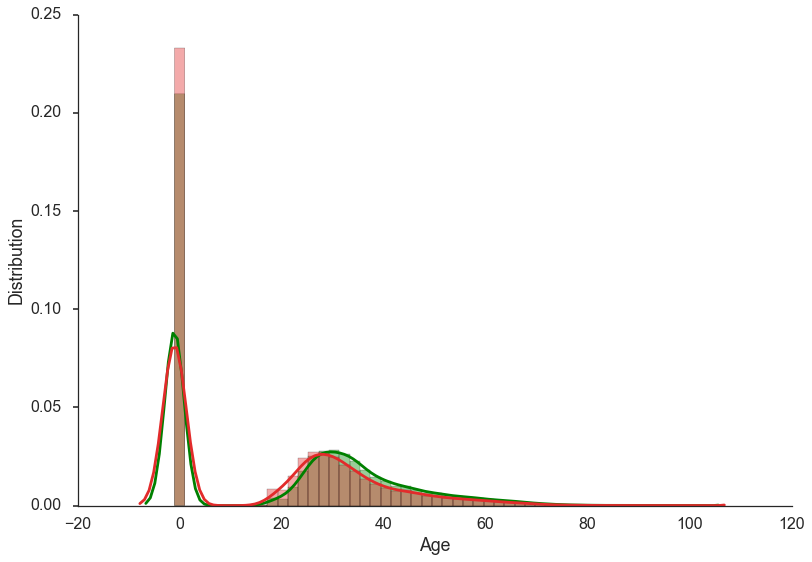

In [68]:
# Lets graph the age group as a distribution to check if all is well

sns.distplot(features.age.dropna(),color='green')
sns.distplot(test_data.age.dropna(),color='#e22b2b')
plt.xlabel('Age')
plt.ylabel('Distribution')
sns.despine()

The Green Line represents train_data.  
The Red Line represents test data. 

Both the distributions contain a lot of -1 values. The rest of the age groups agree with each other too. One of the interesting things to notice would be how the ML algorithm will classify the users with the imputed -1 age values.

test_data contains these years: [2014]
train_data contains these years: [2010 2011 2014 2012 2013]
test_data contains these months: [7 8 9]
train_data contains these months: [ 6  5  9 12  1  2  3  4 11  7  8 10]


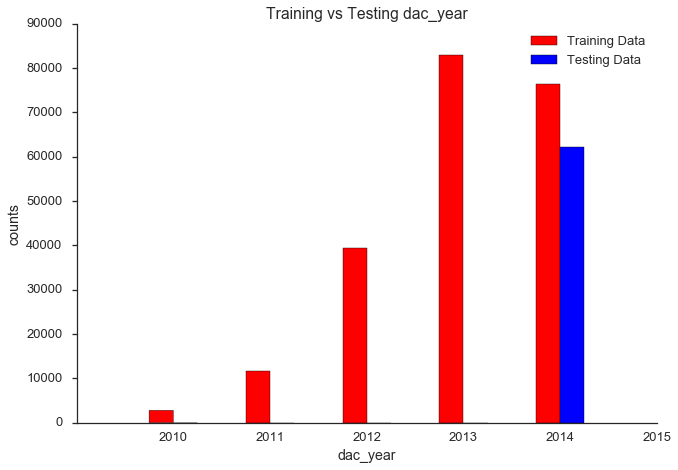

In [69]:
# Graphing the Months and years between the training and testing.

sns.set_context("talk")

bins = [2010,2011,2012,2013,2014,2015]
plt.hist([features.dac_year, test_data.dac_year],bins, histtype='bar',color=['red','blue'], rwidth=.5, align='left',label=('Training Data','Testing Data'))
plt.xticks(bins,[2010,2011,2012,2013,2014,2015])
plt.legend()
plt.title("Training vs Testing dac_year")
plt.xlabel('dac_year')
plt.ylabel("counts")
sns.despine()

print "test_data contains these years:",test_data.dac_year.unique()
print "train_data contains these years:",features.dac_year.unique()

print "test_data contains these months:",test_data.dac_month.unique()
print "train_data contains these months:",features.dac_month.unique()



The test data only contains 2014 datasets. but the training data contains datasets from 2010-2014.
The same is true for months where test data only has 7,8 and 9 . Whereas the training set has all 12 months.
There is a possibility that when we test this data, the predictions might heavily rely on training datasets from 7,8,9 months.

# Exploring datasets countries and age_gender_brackets

In [70]:
# Countries Dataset
countries

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


This dataset merely contains the 9 countries listed and contains latitude,longitude, distance from US, area in square km, the language in the country and a metric value which is the measure of how much each countries language is different from English.

Some of the use cases of this dataset that I can think of:

1. The distance of the destination from US, People tend to travel smaller distances more frequently. Thereby this could maybe be of potential value.
2. The language_levenshtein_distance can also be a factor, people might tend to go to places that speak in english for ease of travel or maybe there might be people who want to experience new cultures altogether.

In [71]:
brackets

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0
5,75-79,AU,male,298.0,2015.0
6,70-74,AU,male,415.0,2015.0
7,65-69,AU,male,574.0,2015.0
8,60-64,AU,male,636.0,2015.0
9,55-59,AU,male,714.0,2015.0


This dataset contains the amount of people who selected different destinations based on the age brackets and gender.  
This dataset might not contain data that is highly important as almost all the data is from 2015. We are trying to train on 2010 - 2014 and predict some months in 2014.


# Sessions Data Exploration and Cleaning

In [72]:
sessions

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703.0
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831.0
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842.0
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0


Sessions data contains every action a user took when he/she was on the airbnb website, what type of action it was, the device used and how many seconds was spent for each task. 

This is a big dataset which contains 10567737 rows and 6 columns. 

The action type each user takes will most likely correspond to a booking or no booking. The user actions taken by those users who have booked can be used to train the ML algorithm. Also the sec_elapsed feature is quite important as longer time spend on the website can lead to a booking. This dataset might contain data which pertains to whether a person a person will book or not. Therefore the ML model might be able to distinguish between NDF and other values of country_destination.

The key on which training,testing dataset can be joined to session dataset is user_id.   
But before joining them there is a need to clean, modify the data so that joining on a unique user_id is possible.  

Lets take a look at this dataset in detail.

In [73]:
for column in sessions.columns:
    print "Description of", column
    print sessions[column].describe()
    print "\nUnique elements in", column
    print sessions[column].unique()

Description of user_id
count       10533241
unique        135483
top       mxqbh3ykxl
freq            2722
Name: user_id, dtype: object

Unique elements in user_id
['d1mm9tcy42' 'yo8nz8bqcq' '4grx6yxeby' ..., 'fa6260ziny' '87k0fy4ugm'
 '9uqfg8txu3']
Description of action
count     10488111
unique         359
top           show
freq       2768278
Name: action, dtype: object

Unique elements in action
['lookup' 'search_results' 'personalize' 'index' 'similar_listings'
 'ajax_refresh_subtotal' 'show' 'header_userpic' 'ask_question' nan
 'other_hosting_reviews_first' 'hosting_social_proof' 'decision_tree'
 'recent_reservations' 'faq_experiment_ids' 'multi' 'active' 'dashboard'
 'create' 'confirm_email' 'show_personalize' 'verify' 'pending' 'requested'
 'concierge' 'faq' 'clear_reservation' 'cancellation_policies'
 'track_page_view' 'update' 'my' 'campaigns' 'notifications' 'listings'
 'unavailabilities' 'ajax_lwlb_contact' 'ajax_check_dates' 'qt2'
 'request_new_confirm_email' 'ajax_photo_w

There are unknown elements in this datset, Lets change all of them to NaN.

In [74]:
# Replacing session unknowns with NaN

for i in sessions.columns:
    sessions[i].replace("-unknown-", np.nan, inplace=True)

In [75]:
# Verifying whether -unknown- elements have been replaced with NaN
print sessions.device_type.unique()

['Windows Desktop' nan 'Mac Desktop' 'Android Phone' 'iPhone' 'iPad Tablet'
 'Android App Unknown Phone/Tablet' 'Linux Desktop' 'Tablet' 'Chromebook'
 'Blackberry' 'iPodtouch' 'Windows Phone' 'Opera Phone']


In [76]:
# Make a copy as checkpoint
sessions2 = sessions.copy()

As there are a lot of categorical values in almost all the columns, We will have to one hot encode them.
Below, I am creating dummy columns for `action, action_type and action_detail`

** The requirement of this function is given below.**  
sklearn.OneHotEncoder did not work for converting this dataframe as when I was run it using this particular function. The iPython Notebook Crashed and a restart of kernal was suggested. The underlying reason for the problem is unknown. Therefore I wrote a create_dummy function to handle it for me.

First , The columns that has to one hot encoded is created which is 

"to_dummy = ['action','action_type','action_detail']"

create_dummy function will take the dataframe and column to one hot encode as the parameters.
Creates a new dataframe which contains the user_id and the column.
creates a new column named "count" and assigns 1 to every row.
Groupby the newdf by user_id and column pair, which will lead to counting up the values that were created in count column.
Now pivot the newdf based on user_id , where columns are col and column values will be the count.
This basically creates columsn for all the unique values. 
Now just rename the columns based on the unique value and the inital column.

For the three columns that are being one hot encoded. They are concatenated outside the function. One of the points that is to be noted is that , once you concatenate in that manner, the user_id becomes the index. so you have to reindex these dataframe to easily join with the other dataframes

reference: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [77]:
def create_dummy(df, col):
    ''' to creat dummy columns for any given categorical value. In this case
        ['action','action_type','action_detail'] 
    '''
    newdf = df.loc[:,['user_id',col]]
    newdf['count'] = 1
    newdf = newdf.groupby(by=['user_id', col], as_index=False, sort=False).sum()
    newdf = newdf.pivot(index='user_id',columns=col, values='count')
    newdf = newdf.fillna(0)
    
    
    # Rename Columns
    categories = list(df[col].drop_duplicates())
    for category in categories:
        cat_name = str(category).replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_").replace("-", "").lower()
        col_name = col + '_' + cat_name
        newdf.rename(columns = {category:col_name}, inplace=True)
    return newdf


# Defining the columns which are to be one hot encoded
to_dummy = ['action','action_type','action_detail']
firstdf_bool = True # boolean value for switching
count = 1

for dummy in to_dummy:
    print "Creating dummy values for", dummy
    newdf = create_dummy(sessions, dummy)
    
    if firstdf_bool:
        firstdf_bool = False
        session_dummy = newdf
    else:
        count += 1
        print count,"column concatinating"
        session_dummy = pd.concat([session_dummy, newdf],ignore_index=False, axis=1, join='inner')

print session_dummy.describe()
print session_dummy



Creating dummy values for action
Creating dummy values for action_type
2 column concatinating
Creating dummy values for action_detail
3 column concatinating
           action_10      action_11      action_12      action_15  \
count  133704.000000  133704.000000  133704.000000  133704.000000   
mean        0.023948       0.005250       0.016484       0.007876   
std         0.445561       0.116296       0.265597       0.231165   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max        53.000000      11.000000      28.000000      40.000000   

       action_about_us  action_accept_decline  action_account  \
count    133704.000000          133704.000000   133704.000000   
mean          0.003081               0.000015        0.067335   
std           0.080328    

In [78]:
# Verifying whether dummy column function on session data worked correctly.
session_dummy

,action_10,action_11,action_12,action_15,action_about_us,action_accept_decline,action_account,action_acculynk_bin_check_failed,action_acculynk_bin_check_success,action_acculynk_load_pin_pad,...,action_detail_view_resolutions,action_detail_view_search_results,action_detail_view_security_checks,action_detail_view_user_real_names,action_detail_wishlist,action_detail_wishlist_content_update,action_detail_wishlist_note,action_detail_your_listings,action_detail_your_reservations,action_detail_your_trips
user_id,,,,,,,,,,,,,,,,,,,,,
00023iyk9l,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0
0010k6l0om,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0
001wyh0pz8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0028jgx1x1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
002qnbzfs5,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0031awlkjq,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0035hobuyj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,200.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0
00378ocvlh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
00389675gq,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,14.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0


#### The OHE is done. it has 133704 rows × 523 columns

The secs_elapsed column in sessions data will definitely give us a lot of information regarding how long users have used the service, longer times might correlate to making a booking.

**Adding up all the secs_elapsed in sessions for each user_id and grouping it.**

In [79]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [80]:
def get_secs_elapsed(df):
    '''Grouping the user_id and secs_elapsed for all users and returns a new DataFrame'''
    newdf = df.loc[:,['user_id','secs_elapsed']]
    newdf = newdf.groupby(by=['user_id'], as_index=False, sort=True).sum()
    return newdf

session_elapsed = get_secs_elapsed(sessions)
session_elapsed = session_elapsed.set_index('user_id')

In [81]:
# Verifying 
session_elapsed.head()

,secs_elapsed
user_id,
00023iyk9l,867896.0
0010k6l0om,586543.0
001wyh0pz8,282965.0
0028jgx1x1,297010.0
002qnbzfs5,6487080.0


In [82]:
session_dummy.head()

,action_10,action_11,action_12,action_15,action_about_us,action_accept_decline,action_account,action_acculynk_bin_check_failed,action_acculynk_bin_check_success,action_acculynk_load_pin_pad,...,action_detail_view_resolutions,action_detail_view_search_results,action_detail_view_security_checks,action_detail_view_user_real_names,action_detail_wishlist,action_detail_wishlist_content_update,action_detail_wishlist_note,action_detail_your_listings,action_detail_your_reservations,action_detail_your_trips
user_id,,,,,,,,,,,,,,,,,,,,,
00023iyk9l,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0
0010k6l0om,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0
001wyh0pz8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0028jgx1x1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
002qnbzfs5,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Both `session_elapsed` and `session_dummy` after the transformation have their `user_id` column as the index since we used groupby method in pandas.

Reindexing both the datasets

In [83]:
session_dummy = session_dummy.reset_index()
session_elapsed = session_elapsed.reset_index()

In [84]:
print "Total number of rows in session_dummy:", len(session_dummy)
print "Total number of columns in session_dummy:", len(session_dummy.columns)
print "Total number of unique user_id values in session_dummy:", len(session_dummy.user_id.unique())
session_dummy

Total number of rows in session_dummy: 133704
Total number of columns in session_dummy: 523
Total number of unique user_id values in session_dummy: 133704


,user_id,action_10,action_11,action_12,action_15,action_about_us,action_accept_decline,action_account,action_acculynk_bin_check_failed,action_acculynk_bin_check_success,...,action_detail_view_resolutions,action_detail_view_search_results,action_detail_view_security_checks,action_detail_view_user_real_names,action_detail_wishlist,action_detail_wishlist_content_update,action_detail_wishlist_note,action_detail_your_listings,action_detail_your_reservations,action_detail_your_trips
0,00023iyk9l,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0
1,0010k6l0om,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0
2,001wyh0pz8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0028jgx1x1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,002qnbzfs5,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0031awlkjq,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0035hobuyj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,200.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0
7,00378ocvlh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
8,00389675gq,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,14.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0
9,003iamz20l,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
print "Total number of rows in session_elapsed:", len(session_elapsed)
print "Total number of columns in session_elapsed:", len(session_elapsed.columns)
print "Total number of unique user_id values in session_elapsed:", len(session_elapsed.user_id.unique())
session_elapsed

Total number of rows in session_elapsed: 135483
Total number of columns in session_elapsed: 2
Total number of unique user_id values in session_elapsed: 135483


,user_id,secs_elapsed
0,00023iyk9l,867896.0
1,0010k6l0om,586543.0
2,001wyh0pz8,282965.0
3,0028jgx1x1,297010.0
4,002qnbzfs5,6487080.0
5,0031awlkjq,39574.0
6,0035hobuyj,5724670.0
7,00378ocvlh,1827164.0
8,00389675gq,2605711.0
9,003iamz20l,1590236.0


In [86]:
# Checking for count of null values in session_elapsed and session_dummy
print "Session elapsed NULL values\n ",session_elapsed.isnull().sum()

print "\n\nSession dummy NULL values\n ",session_dummy.isnull().sum()

Session elapsed NULL values
  user_id            0
secs_elapsed    1426
dtype: int64


Session dummy NULL values
  user_id                                      0
action_10                                    0
action_11                                    0
action_12                                    0
action_15                                    0
action_about_us                              0
action_accept_decline                        0
action_account                               0
action_acculynk_bin_check_failed             0
action_acculynk_bin_check_success            0
action_acculynk_load_pin_pad                 0
action_acculynk_pin_pad_error                0
action_acculynk_pin_pad_inactive             0
action_acculynk_pin_pad_success              0
action_acculynk_session_obtained             0
action_active                                0
action_add_business_address_colorbox         0
action_add_guest_colorbox                    0
action_add_guests                      

session_elapsed has some null values for some users. They might just be people who have just signed up or did not use the service at all. Lets keep them for now and merge all before we remove or impute NaN values.  

Both session_elapsed and session_dummy has no duplicate user_id. We can merge them based on the user_id.

In [87]:
# Merge session_dummy and session_elapsed datasets on user_id

session_final = session_dummy.merge(session_elapsed, how='outer', on='user_id')
session_final = session_final.fillna(0) # Imputing the NA values with 0.0 specifically secs_elapsed


In [88]:
print "Total number of rows in session_final",len(session_final)
session_final

Total number of rows in session_final 135483


,user_id,action_10,action_11,action_12,action_15,action_about_us,action_accept_decline,action_account,action_acculynk_bin_check_failed,action_acculynk_bin_check_success,...,action_detail_view_search_results,action_detail_view_security_checks,action_detail_view_user_real_names,action_detail_wishlist,action_detail_wishlist_content_update,action_detail_wishlist_note,action_detail_your_listings,action_detail_your_reservations,action_detail_your_trips,secs_elapsed
0,00023iyk9l,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,867896.0
1,0010k6l0om,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,586543.0
2,001wyh0pz8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,282965.0
3,0028jgx1x1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,297010.0
4,002qnbzfs5,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6487080.0
5,0031awlkjq,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39574.0
6,0035hobuyj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,200.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,5724670.0
7,00378ocvlh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1827164.0
8,00389675gq,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,14.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,2605711.0
9,003iamz20l,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1590236.0


session_final is our modified session dataframe which we will join with the training data(features) and test data. This joined dataframe is what we will plug in as training data for our ML model.

## Lets merge the training data(features) and the testing data(test_data) with the sessions data(session_final)

In [89]:
# Checkpoint for the features
features1 = features.copy()

As the features, test_data and session data id column names are **different**. Lets change session_final `user_id` to `id`

In [90]:
# Renaming {'user_id' to 'id'}
session_final.rename(columns = {'user_id':'id'}, inplace=True)
session_final

,id,action_10,action_11,action_12,action_15,action_about_us,action_accept_decline,action_account,action_acculynk_bin_check_failed,action_acculynk_bin_check_success,...,action_detail_view_search_results,action_detail_view_security_checks,action_detail_view_user_real_names,action_detail_wishlist,action_detail_wishlist_content_update,action_detail_wishlist_note,action_detail_your_listings,action_detail_your_reservations,action_detail_your_trips,secs_elapsed
0,00023iyk9l,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,867896.0
1,0010k6l0om,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,586543.0
2,001wyh0pz8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,282965.0
3,0028jgx1x1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,297010.0
4,002qnbzfs5,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6487080.0
5,0031awlkjq,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39574.0
6,0035hobuyj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,200.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,5724670.0
7,00378ocvlh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1827164.0
8,00389675gq,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,14.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,2605711.0
9,003iamz20l,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1590236.0


In [91]:
# All the datasets have unique values for id
print "Number of Session Data duplicate values",len(session_final) - len(session_final.id.unique())
print "Number of Training Data duplicate values",len(features) - len(features.id.unique())
print "Number of Testing Data duplicate values",len(test_data) - len(test_data.id.unique())

Number of Session Data duplicate values 0
Number of Training Data duplicate values 0
Number of Testing Data duplicate values 0


In [92]:
print len(session_final)
print len(features)
print len(test_data)

135483
213451
62096


In [93]:
# Merging/Joining the testing data with sessions and training data with sessions.
training_data_merged = features.merge(session_final,on="id",how='left')
testing_data_merged = test_data.merge(session_final,on="id",how='left')

training_data_merged

,id,age,signup_flow,country_destination,dac_year,dac_month,dac_day,tfa_year,tfa_month,tfa_day,...,action_detail_view_search_results,action_detail_view_security_checks,action_detail_view_user_real_names,action_detail_wishlist,action_detail_wishlist_content_update,action_detail_wishlist_note,action_detail_your_listings,action_detail_your_reservations,action_detail_your_trips,secs_elapsed
0,gxn3p5htnn,-1.0,0,NDF,2010,6,28,2009,3,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,820tgsjxq7,38.0,0,NDF,2011,5,25,2009,5,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4ft3gnwmtx,56.0,3,US,2010,9,28,2009,6,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bjjt8pjhuk,42.0,0,other,2011,12,5,2009,10,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,87mebub9p4,41.0,0,US,2010,9,14,2009,12,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,osr2jwljor,-1.0,0,US,2010,1,1,2010,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,lsw9q7uk0j,46.0,0,US,2010,1,2,2010,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0d01nltbrs,47.0,0,US,2010,1,3,2010,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,a1vcnhxeij,50.0,0,US,2010,1,4,2010,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6uh8zyj2gn,46.0,0,US,2010,1,4,2010,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
print "number of training users which do not have sessions_data",len(training_data_merged)-len(training_data_merged.secs_elapsed.dropna())
print "number of testing users which do not have sessions_data",len(testing_data_merged)-len(testing_data_merged.secs_elapsed.dropna())

training_no_session_data = len(training_data_merged)-len(training_data_merged.secs_elapsed.dropna())
testing_no_session_data = len(testing_data_merged)-len(testing_data_merged.secs_elapsed.dropna())

print "Percentage of users who do not have a sessions_data in training set : %s" % ((float(training_no_session_data)/len(training_data_merged))*100)
print "Percentage of users who do not have a sessions_data in testing set : %s" % ((float(testing_no_session_data)/len(testing_data_merged))*100)

number of training users which do not have sessions_data 139636
number of testing users which do not have sessions_data 428
Percentage of users who do not have a sessions_data in training set : 65.4182927229
Percentage of users who do not have a sessions_data in testing set : 0.68925534656


About 65% of training data has no session data values. 
For testing dataset only .68% has no session_data. 

This difference suggest that maybe we should train only on the training data rows that have session_data. It might give us a better accuracy.

Therefore lets create two training sets, one which is the whole training_data_merged and the other which contains only the rows which have session_data. lets run both these training sets and check which one performs better initially . Later on we can select one among them and then tune it. 

In [95]:
training_data_merged_inner = features.merge(session_final,on="id",how='inner')
training_data_merged_inner

,id,age,signup_flow,country_destination,dac_year,dac_month,dac_day,tfa_year,tfa_month,tfa_day,...,action_detail_view_search_results,action_detail_view_security_checks,action_detail_view_user_real_names,action_detail_wishlist,action_detail_wishlist_content_update,action_detail_wishlist_note,action_detail_your_listings,action_detail_your_reservations,action_detail_your_trips,secs_elapsed
0,d1mm9tcy42,62.0,0,other,2014,1,1,2014,1,1,...,23.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,3427529.0
1,yo8nz8bqcq,-1.0,0,NDF,2014,1,1,2014,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,207842.0
2,4grx6yxeby,-1.0,0,NDF,2014,1,1,2014,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1135444.0
3,ncf87guaf0,-1.0,0,NDF,2014,1,1,2014,1,1,...,32.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,3755100.0
4,4rvqpxoh3h,-1.0,25,GB,2014,1,1,2014,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2555.0
5,c8mfesvkv0,-1.0,0,NDF,2014,1,1,2014,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1380288.0
6,xwxei6hdk4,32.0,0,US,2014,1,1,2014,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49673.0
7,5f45ro5uzk,-1.0,0,NDF,2014,1,1,2014,1,1,...,7.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,605413.0
8,ro2stddszp,19.0,0,other,2014,1,1,2014,1,1,...,5.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,1284401.0
9,qtw88d9pbl,25.0,0,NDF,2014,1,1,2014,1,1,...,39.0,0.0,0.0,1.0,43.0,0.0,0.0,0.0,1.0,2868205.0


In [116]:
testing_data_merged

,id,age,signup_flow,dac_year,dac_month,dac_day,tfa_year,tfa_month,tfa_day,gender_FEMALE,...,action_detail_view_search_results,action_detail_view_security_checks,action_detail_view_user_real_names,action_detail_wishlist,action_detail_wishlist_content_update,action_detail_wishlist_note,action_detail_your_listings,action_detail_your_reservations,action_detail_your_trips,secs_elapsed
0,5uwns89zht,35.0,0,2014,7,1,2014,7,1,1,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,119187.0
1,jtl0dijy2j,-1.0,0,2014,7,1,2014,7,1,0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250119.0
2,xx0ulgorjt,-1.0,0,2014,7,1,2014,7,1,0,...,48.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,975575.0
3,6c6puo6ix0,-1.0,0,2014,7,1,2014,7,1,0,...,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,123001.0
4,czqhjk3yfe,-1.0,0,2014,7,1,2014,7,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,454023.0
5,szx28ujmhf,28.0,0,2014,7,1,2014,7,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60924.0
6,guenkfjcbq,48.0,25,2014,7,1,2014,7,1,0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,640922.0
7,tkpq0mlugk,-1.0,0,2014,7,1,2014,7,1,0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,391231.0
8,3xtgd5p9dn,-1.0,0,2014,7,1,2014,7,1,0,...,84.0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,8481847.0
9,md9aj22l5a,-1.0,0,2014,7,1,2014,7,1,0,...,12.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,5084265.0


In [96]:
print "training_data_merged_inner number of null values: \n",training_data_merged_inner.isnull().sum()
print "training_data_merged number of null values: \n",training_data_merged.isnull().sum()
print "testing_data_merged number of null values: \n",testing_data_merged.isnull().sum()

training_data_merged_inner number of null values: 
id                                           0
age                                          0
signup_flow                                  0
country_destination                          0
dac_year                                     0
dac_month                                    0
dac_day                                      0
tfa_year                                     0
tfa_month                                    0
tfa_day                                      0
gender_FEMALE                                0
gender_MALE                                  0
gender_OTHER                                 0
signup_method_basic                          0
signup_method_facebook                       0
signup_method_google                         0
language_ca                                  0
language_cs                                  0
language_da                                  0
language_de                                  0
language_

As there are NaN values in testing_data_merged and training_data_merged . We will impute them to -1.

### Imputing NaN values with -1 for testing_data_merged and training_data_merged.

In [97]:
# Imputing Datasets

testing_data_merged = testing_data_merged.fillna(-1)
training_data_merged = training_data_merged.fillna(-1)
training_data_merged_inner = training_data_merged_inner.fillna(-1)

# Writing the three datasets to file. 

## ML algorithm and prediction will be done in Airbnb_New_User_Booking_Prediction_Part_2_of_2

In [98]:
testing_data_merged.to_csv('testing_data_merged.csv',index=False)
training_data_merged.to_csv('training_data_merged.csv',index=False)
training_data_merged_inner.to_csv('training_data_merged_inner.csv',index=False)

# Please open Part 2 of this iPython Notebook